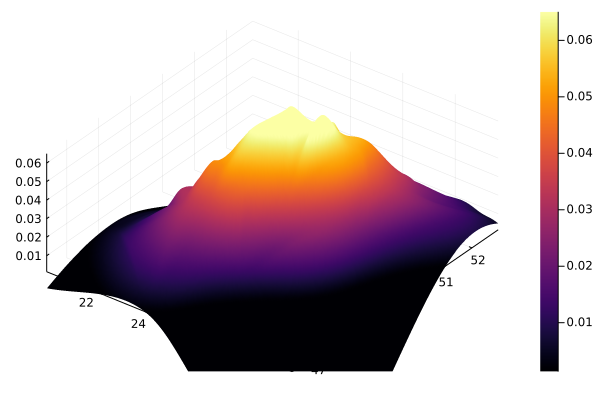

In [238]:
# Train data
using Distributions
μ = [25; 50]; Σ = [4.0 √3; √3 2.0]; Λ = inv(Σ); N = 100
Xᵗ = rand(MvNormal(μ, Σ), N)

# Hyperparameter
m = [0; 0]; Σₘ = [100 0; 0 100]; Λₘ = inv(Σₘ)

# Training
Λ̂ₘ = N*Λ+Λₘ
m̂ = vec(inv(Λ̂ₘ)*(Λ*sum(Xᵗ,dims=2)+Λₘ*m))

# Prediction
Λₚ = inv(inv(Λ)+inv(Λ̂ₘ))
μₚ = m̂

# Test data
Xᵖ = rand(MvNormal(μ, Σ), 50)

# Plots
using Plots
p̂ = pdf(MvNormal(μₚ, Σₚ), Xᵖ)
surface(Xᵖ[1,:], Xᵖ[2,:], p̂, camera=(40,70))

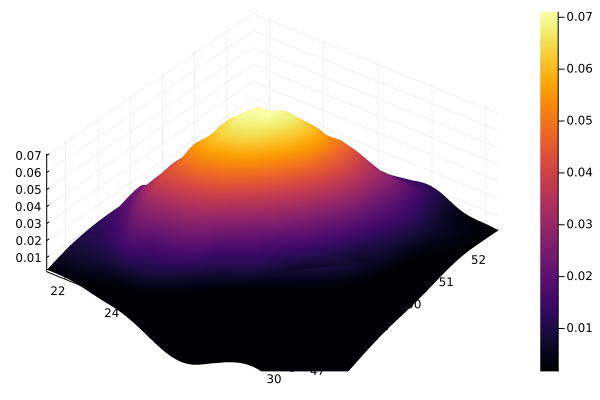

In [239]:
p = pdf(MvNormal(μ, Σ), Xᵗ)
surface(Xᵗ[1,:], Xᵗ[2,:], p, camera=(40,70))